# Data Import

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
google_data = pd.read_csv('googleplaystore.csv')

In [3]:
type(google_data)

pandas.core.frame.DataFrame

### Descriptive Data

In [4]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_data.shape

(10841, 13)

In [6]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


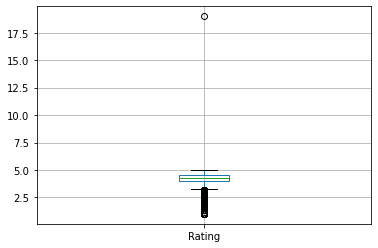

In [7]:
google_data.boxplot() #Most of the data is concentrated between the 3.0 to 5.0 range. An outlier is present above 17.5 for the Rating column. Rating is the only column to appear in the boxplot because it is the only numerical set of values in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125355df0>]],
      dtype=object)

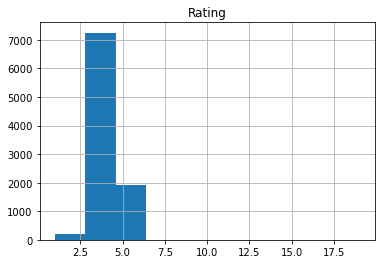

In [8]:
google_data.hist() #Data in histogram is skewed to the right for Ratings.

In [9]:
google_data.info() #Rating is the only float dtype, the rest are objects. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
google_data.isnull() #Finds null values where isnull = True.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
google_data.isnull().sum() #Total sum of missing values by column.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
google_data[google_data.Rating > 5] #Finds all outliers for Ratings that exist above 5.0. Since line 10472's rating is greater than 5 (19.0), it is an outlier in the dataset.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Data Cleansing 

In [13]:
google_data.drop([10472], inplace = True) #Dropping the outlier for row 10472.

In [14]:
google_data[10470:10475] #Outlier row 10472 is now dropped.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


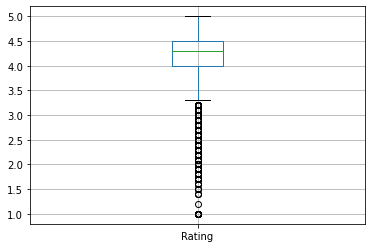

In [15]:
google_data.boxplot() #Re-Run Boxplot to observe data without the outlier. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1254ac3a0>]],
      dtype=object)

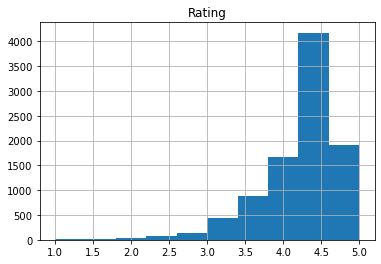

In [16]:
google_data.hist() #Since the data remains right skewed after removing outliers, using the median is the best point of reference in this case.

In [17]:
threshold = len(google_data) * 0.1 #Removes all columns that are 90% empty (Taking 10% of all rows = 1084)
threshold

1084.0

In [18]:
google_data.dropna(thresh=threshold, axis=1, inplace= True) #Drops threshold.

In [19]:
print(google_data.isnull().sum()) #Prints all null values minus the outliers.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [20]:
google_data.shape #Note the outlier dropped here (10840,13) vs. (10841, 13) in the previous .shape().

(10840, 13)

# Insights 

In [21]:
#Fill the null values with appropriate values using aggregate functions (mean, median, mode).

#Define a function impute_median (i.e. to replace missing data with a given value--in this case, the median).

def impute_median(series):
    return series.fillna(series.median())

In [22]:
google_data.Rating = google_data['Rating'].transform(impute_median) #Median is imputed since the data skews to the right.

In [23]:
google_data.isnull().sum() #Counts the new number of null values in each column.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [24]:
#For categorical values, mode is used.

print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [25]:
#Fills the missing categorical values (Type, Current Ver, Android Ver) with mode. 

google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace = True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace = True)

In [26]:
#Counts the number of null values in each column. Note that Null = 0 for each column. 

google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
#Convert Price, Reviews, and Ratings into numerical values.

google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [28]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [29]:
google_data.head(10) #Shows the adjusted data types.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [30]:
google_data.describe()  #Summary stats after cleaning.

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data Visualization 

In [31]:
grp = google_data.groupby('Category')  #Groups the data for apps based on category.
x = grp['Rating'].agg(np.mean)   #Extracts the columns for Rating, Price, and Reviews to aggregate these data. 
y = grp['Price'].agg(np.sum)     #Price is aggregated as sum for the purpose of determining total revenue. 
z = grp['Reviews'].agg(np.mean) #Note that the dtypes below have been converted to the float dtype. 
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

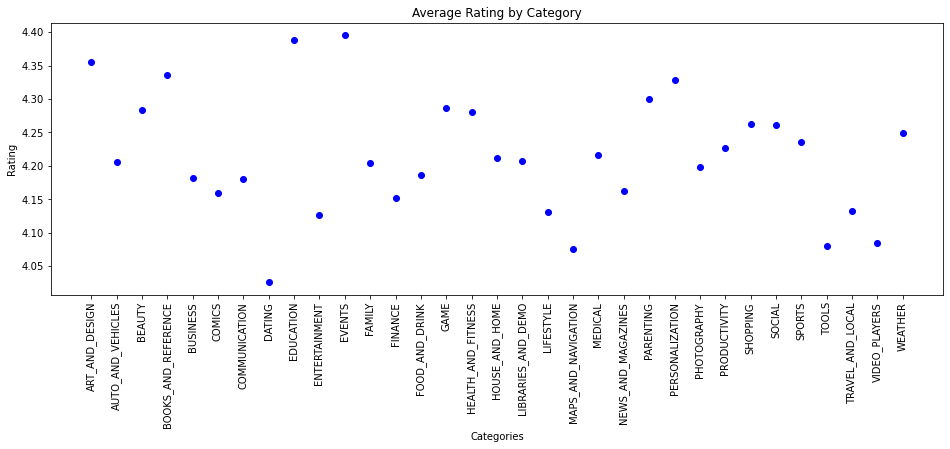

In [32]:
#Visualizing the output of Ratings.

plt.figure(figsize=(16,5))
plt.plot(x, 'ro', color ='b')
plt.xticks(rotation=90)
plt.title('Average Rating by Category')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

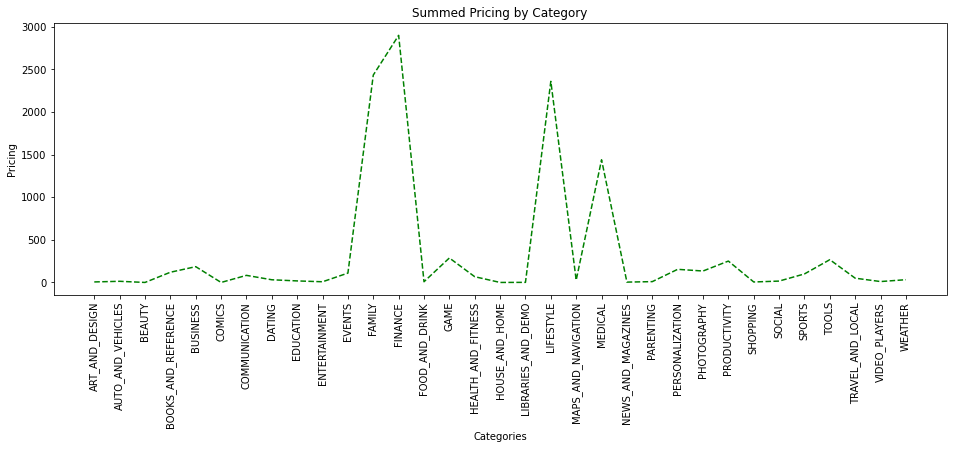

In [33]:
#Visualizing the output of Price

plt.figure(figsize=(16,5))
plt.plot(y, 'r--', color ='g')
plt.xticks(rotation=90)
plt.title('Summed Pricing by Category')
plt.xlabel('Categories')
plt.ylabel('Pricing')
plt.show()

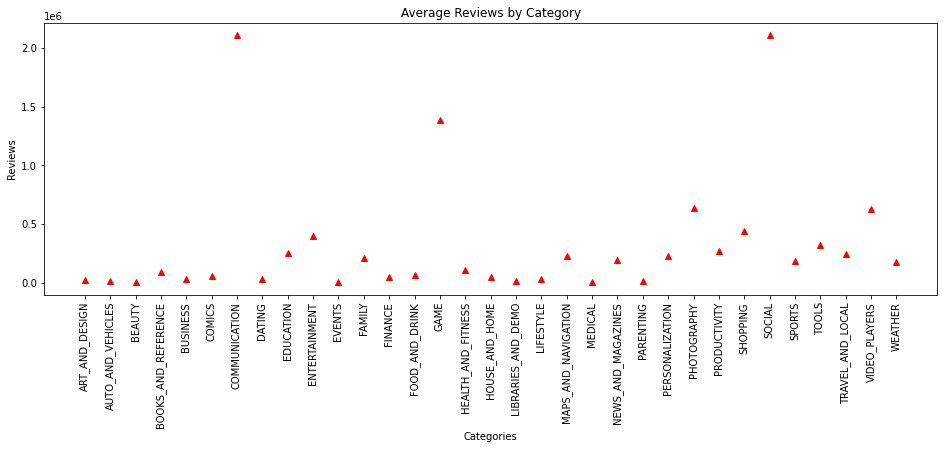

In [34]:
#Visualizing the output of Reviews

plt.figure(figsize=(16,5))
plt.plot(z, 'g^', color ='r')
plt.xticks(rotation=90)
plt.title('Average Reviews by Category')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

In [41]:
google_data.corr() #Assess coorelation.

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
Reviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


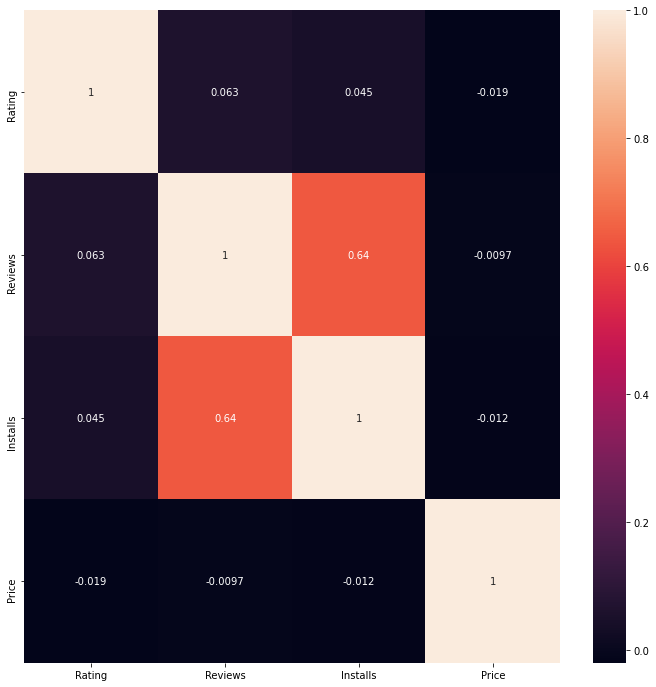

In [43]:
#Visualize Coorelation HeatMap

f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(google_data.corr(), annot = True, ax=ax)
plt.show()

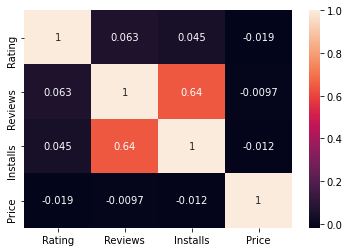

In [54]:
#Adjust heat map size.

raw_corr = google_data.corr() 
sns.heatmap(raw_corr, annot = True)

#### The heatmap above shows there is a moderately positive coorelation between number of reviews and installs. 

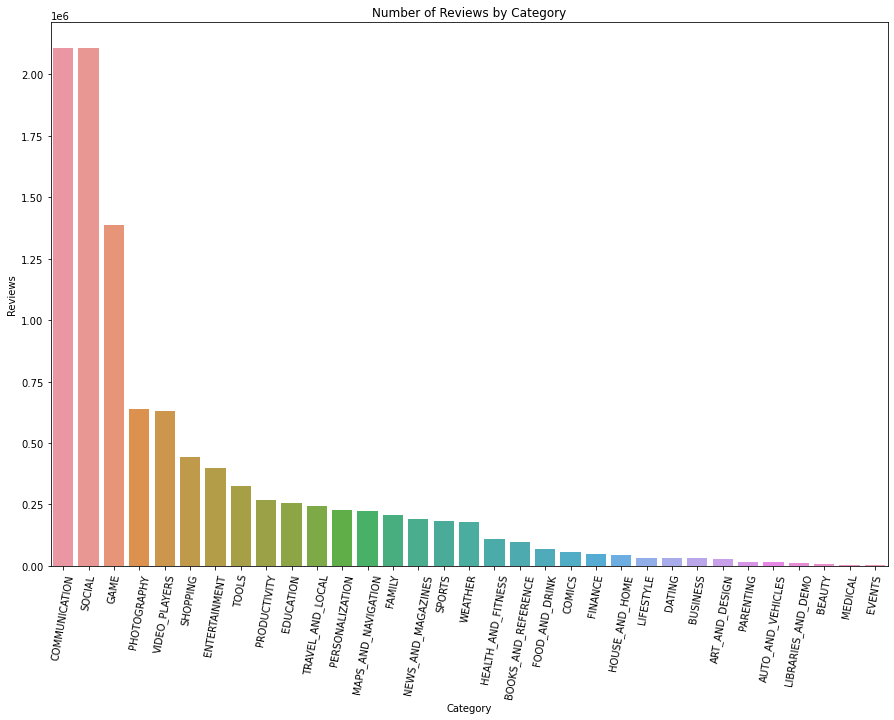

In [50]:
#Visualize number of reviews by category. 

category_list = list(google_data['Category'].unique())
category_review = []
for i in category_list:
    x = google_data[google_data['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
        
#Data sorting.
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

#Visualization.
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Number of Reviews by Category")
plt.show()

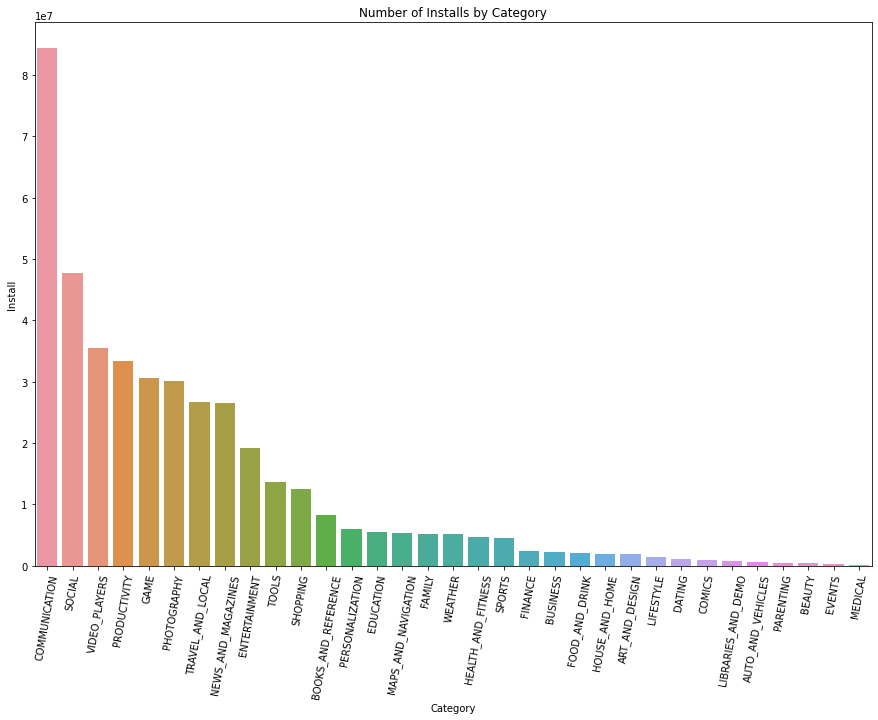

In [49]:
#Visualize number of installs by category.

category_list = list(google_data['Category'].unique())
category_install = []
for i in category_list:
    x = google_data[google_data['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Number of Installs by Category")
plt.show()

In [57]:
variables = ['Rating', 'Reviews', 'Installs', 'Price']

Y = google_data['Installs']
X = google_data[variables]
X = sm.add_constant(X)
model_raw = sm.OLS(Y,X)
results_raw = model_raw.fit()
results_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.096e+33
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:33:55   Log-Likelihood:             1.6632e+05
No. Observations:               10840   AIC:                        -3.326e+05
Df Residuals:                   10835   BIC:                        -3.326e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.825e-07   4.45e-09    -40.978      0.000   -1.91e-07   -1.74e-07
Rating      4.098e-08   1.05e-09     38.916      0.000    3.89e-08     4.3e-08
Reviews    -7.327e-15   2.25e-16    -32.519      0.000   -7.77e-15   -6.89e-15
Installs       1.0000   7.75e-18   1.29e+17      0.000       1.000       1.000
Price      -1.017e-09   3.16e-11    -32.127      0.000   -1.08e-09   -9.55e-10
==============================================================================
Omnibus:                    12493.396   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2562613.173
Skew:                          -5.775   Prob(JB):                         0.00
Kurtosis:                      77.433   Cond. No.                     7.84e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""